# Проект "Исследование объявлений о продаже квартир"

# Описание проекта

На основании архива объявлений о продаже квартир по данным сервиса Яндекс.Недвижимость предстоит проанализировать и определить параметры влияющие на стоимость объектов недвижимости в Санкт-Петербурге и прилегающих населенных пунктах. Данное исследование позволит создать автоматизированную систему для выявления аномалий и мошеннической деятельности.

Доступны два вида данных по каждой квартире. Первый вписан пользователем (площадь квартиры, количество комнат, высота потолков), второй получен автоматически на основе картографических данных (расстояние до центра, аэропорта, ближайшего парка и водоёма).

# Цель исследования

- Изучнеие и анализ площади, цены, числа комнат, высоты потолков квартир;
- Изучение количества времени, которое занимает продажа квартиры;
- Изучение факторов влияющих на стоимость квартиры;
- Определение 10-ти населенных пунктов с наибольшим количеством объявлений;
- Определение населенных пунктов с самой высокой и самой низкой стоимостью объектов недвижимости;
- Опеределие центральной зоны для Санкт-Петербурга по данным о расстоянии до центра и средней цене для каждого километра;
- Выделить сегмент квартир в центре Санкт-Петербурга. Изучить факторы, влияющие на их стоимость.

# Задачи исследования

- Обзор данных;
- Предобработка данных;
- Создание вспомогательных датафреймов;
- Создание вспомогательных функций и циклов;
- Построение наглядных графиков.

# Исходные данные

Таблица со столбцами:

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Выгрузка-и-анализ-датасета-с-исходными-данными" data-toc-modified-id="Выгрузка-и-анализ-датасета-с-исходными-данными-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Выгрузка и анализ датасета с исходными данными</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Определение-и-заполнение-пропущенных-значений" data-toc-modified-id="Определение-и-заполнение-пропущенных-значений-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Определение и заполнение пропущенных значений</a></span></li><li><span><a href="#Изменение-типов-данных-в-целевых-столбцах" data-toc-modified-id="Изменение-типов-данных-в-целевых-столбцах-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изменение типов данных в целевых столбцах</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-параметров-площади,-цены,-числа-комнат,-высоты-потолков.-Построение-гистограмм-по-каждому-параметру." data-toc-modified-id="Изучение-параметров-площади,-цены,-числа-комнат,-высоты-потолков.-Построение-гистограмм-по-каждому-параметру.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучение параметров площади, цены, числа комнат, высоты потолков. Построение гистограмм по каждому параметру.</a></span></li><li><span><a href="#Изучение-времени-продажи-квартиры" data-toc-modified-id="Изучение-времени-продажи-квартиры-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изучение времени продажи квартиры</a></span></li><li><span><a href="#Ликвидация-редких-и-выбивающихся-значений" data-toc-modified-id="Ликвидация-редких-и-выбивающихся-значений-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Ликвидация редких и выбивающихся значений</a></span></li><li><span><a href="#Факторы,-влияющие-на-стоимость-квартиры" data-toc-modified-id="Факторы,-влияющие-на-стоимость-квартиры-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Факторы, влияющие на стоимость квартиры</a></span><ul class="toc-item"><li><span><a href="#Графики-зависимости-цены-от-площади,-числа-комнат,-удалённости-от-центра,-даты-размещения(дня,-месяца,-года)" data-toc-modified-id="Графики-зависимости-цены-от-площади,-числа-комнат,-удалённости-от-центра,-даты-размещения(дня,-месяца,-года)-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Графики зависимости цены от площади, числа комнат, удалённости от центра, даты размещения(дня, месяца, года)</a></span></li><li><span><a href="#График-зависимости-цены-от-этажа" data-toc-modified-id="График-зависимости-цены-от-этажа-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>График зависимости цены от этажа</a></span></li><li><span><a href="#Графики-зависимости-цены-от-дня-недели,-месяца-и-года" data-toc-modified-id="Графики-зависимости-цены-от-дня-недели,-месяца-и-года-4.4.3"><span class="toc-item-num">4.4.3&nbsp;&nbsp;</span>Графики зависимости цены от дня недели, месяца и года</a></span></li></ul></li><li><span><a href="#Анализ-десяти-населённых-пунктов-с-наибольшим-числом-объявлений" data-toc-modified-id="Анализ-десяти-населённых-пунктов-с-наибольшим-числом-объявлений-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Анализ десяти населённых пунктов с наибольшим числом объявлений</a></span></li><li><span><a href="#Анализ-изменения-цены-по-степени-удалённости-от-центра" data-toc-modified-id="Анализ-изменения-цены-по-степени-удалённости-от-центра-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Анализ изменения цены по степени удалённости от центра</a></span></li><li><span><a href="#Сравнение-выводов-по-квартирам-в-центре-и-общих-выводов-по-всему-городу" data-toc-modified-id="Сравнение-выводов-по-квартирам-в-центре-и-общих-выводов-по-всему-городу-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Сравнение выводов по квартирам в центре и общих выводов по всему городу</a></span><ul class="toc-item"><li><span><a href="#Построение-гистаграмм-сравнения-центральной-зоны-СПб-со-всем-городом-по-площади,-цене,-числу-комнат,-высоте-потолков" data-toc-modified-id="Построение-гистаграмм-сравнения-центральной-зоны-СПб-со-всем-городом-по-площади,-цене,-числу-комнат,-высоте-потолков-4.7.1"><span class="toc-item-num">4.7.1&nbsp;&nbsp;</span>Построение гистаграмм сравнения центральной зоны СПб со всем городом по площади, цене, числу комнат, высоте потолков</a></span></li><li><span><a href="#Факторы,-влияющие-на-стоимость-квартиры-в-центральной-зоне.-Число-комнат,-этаж,-удалённость-от-центра,-дата-размещения-объявления" data-toc-modified-id="Факторы,-влияющие-на-стоимость-квартиры-в-центральной-зоне.-Число-комнат,-этаж,-удалённость-от-центра,-дата-размещения-объявления-4.7.2"><span class="toc-item-num">4.7.2&nbsp;&nbsp;</span>Факторы, влияющие на стоимость квартиры в центральной зоне. Число комнат, этаж, удалённость от центра, дата размещения объявления</a></span></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Обзор данных

### Импорт библиотек

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Выгрузка и анализ датасета с исходными данными

In [4]:
realty = pd.read_csv('C:/Dev/Jupyter/dist/projects/datasets/ads_sale_of_apartments/ads_sale_of_apartments.csv',sep='\t')
realty.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [5]:
realty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Вывод**

Таблица содержит 22 столбца, 23699 строк. Данные нуждаются в предобработке.

## Предобработка данных

### Определение и заполнение пропущенных значений

In [87]:
#city_centers_nearest — расстояние до центра города (м)
realty.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}, inplace=True)
realty.loc[realty['city_centers_nearest'].isna(), 'city_centers_nearest'] = realty['city_centers_nearest'].median()
realty['city_centers_nearest'].isna().sum()

0

In [88]:
#airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
realty.loc[realty['airports_nearest'].isna(), 'airports_nearest'] = realty['airports_nearest'].median()
realty['airports_nearest'].isna().sum()

0

In [89]:
#ceiling_height — высота потолков (м)
#realty.loc[realty['ceiling_height'].isna(), 'ceiling_height'] = realty['ceiling_height'].median() #заменим пропуски медианным значением
#realty['ceiling_height'].isna().sum() #выведем сумму пропущенных значений по высоте потолков

#Изменения согласно рекомендациям
gb = realty.groupby(['airports_nearest', 'city_centers_nearest'])
realty['ceiling_height'] = realty['ceiling_height'].fillna(gb['ceiling_height'].transform(lambda group: group.median()))
realty['ceiling_height'].isna().sum()

2907

In [90]:
#floors_total — всего этажей в доме
realty.loc[realty['floors_total'].isna(), 'floors_total'] = realty['floors_total'].median()
realty['floors_total'].isna().sum()

0

In [91]:
#living_area — жилая площадь в квадратных метрах (м²)
for area in realty['rooms'].unique():
    median = realty.loc[realty['rooms'] == area, 'living_area'].median()
    realty.loc[(realty['living_area'].isna()) & (realty['rooms'] == area), 'living_area'] = median
realty['living_area'].isna().sum()

0

In [92]:
#locality_name — название населённого пункта
realty = realty.dropna(subset = ['locality_name'])#удалим строки без информации о населённом пункте
realty['locality_name'].isna().sum()

0

In [10]:
#is_apartment — апартаменты (булев тип)
realty['is_apartment'] = realty['is_apartment'].fillna(False)
realty['is_apartment'].isna().sum()   

0

In [94]:
#kitchen_area — площадь кухни в квадратных метрах (м²)
def empty_value(column):
    for value in realty['total_area'].unique():
        median = realty.loc[realty['total_area'] == value, column].median()
        realty.loc[(realty[column].isna()) & (realty['total_area'] == value), column]=median
        realty.loc[realty[column].isna(), column] = realty[column].median()
empty_value('kitchen_area')
realty['kitchen_area'].isna().sum()

0

In [95]:
#balcony — число балконов
for value in realty['locality_name'].unique():
    full = realty['balcony'].fillna(value=0)
    realty.loc[(realty['balcony'].isna()) & (realty['locality_name'] == value), 'balcony']=full
realty['balcony'].isna().sum()

0

In [98]:
#parks_around3000 — число парков в радиусе 3 км
empty_value('parks_around3000')
realty['parks_around3000'].isna().sum()

0

In [99]:
#parks_nearest — расстояние до ближайшего парка (м)
empty_value('parks_nearest')
realty['parks_nearest'].isna().sum()

0

In [100]:
#ponds_around3000 — число водоёмов в радиусе 3 км
empty_value('ponds_around3000')
realty['ponds_around3000'].isna().sum()

0

In [101]:
#ponds_nearest — расстояние до ближайшего водоёма (м)
empty_value('ponds_nearest')
realty['ponds_nearest'].isna().sum()

0

In [103]:
#days_exposition — сколько дней было размещено объявление (от публикации до снятия)
# empty_value('days_exposition')
realty['days_exposition'].isna().sum()

3180

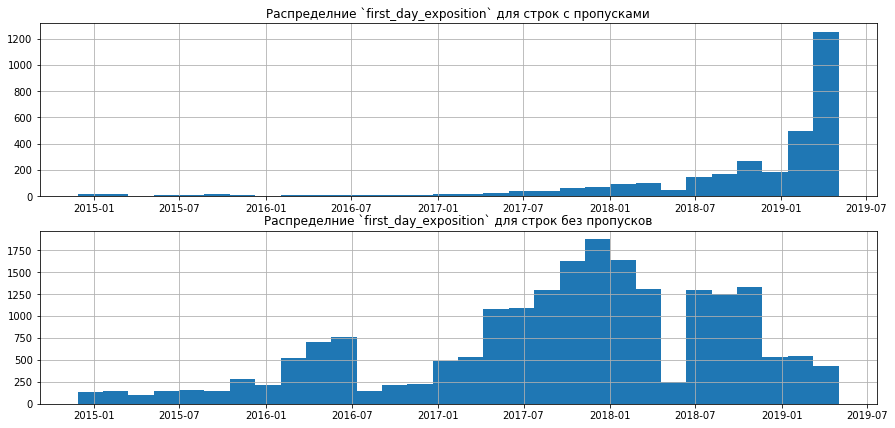

In [105]:
realty['first_day_exposition'] = pd.to_datetime(realty['first_day_exposition'])

fig, axes = plt.subplots(2,1,figsize=(15,7))

realty[realty['days_exposition'].isna()]['first_day_exposition'].hist(ax=axes[0], bins=30)
realty[realty['days_exposition'].notna()]['first_day_exposition'].hist(ax=axes[1], bins=30)

axes[0].set_title('Распределние `first_day_exposition` для строк с пропусками')
axes[1].set_title('Распределние `first_day_exposition` для строк без пропусков')

plt.show()

**Вывод**

Выполнено определение и заполнение пропущенных значений. В большинстве случаев пропущенные значения заполнены медианным значением. Исключение составили "balcony"(пропущенные значения заполенены "0"), "locality_name"(удалены отсуствующие значения в виду малочисленности), тип недвижимости "is_apartment"(пропуски заполнены значением "False").

### Изменение типов данных в целевых столбцах

In [106]:
#Изменим тип данных в столбцах, которые в этом нуждаются.
realty['last_price'] = realty['last_price'].astype('int')

realty['total_area'] = realty['total_area'].astype('int')

# realty['first_day_exposition'] = pd.to_datetime(realty['first_day_exposition'], format='%Y-%m-%d %H:%M:%S')

realty['floors_total'] = realty['floors_total'].astype('int')

realty['balcony'] = realty['balcony'].astype('int')

realty['airports_nearest'] = realty['airports_nearest'].astype('int')

realty['city_centers_nearest'] = realty['city_centers_nearest'].astype('int')

realty['parks_around3000'] = realty['parks_around3000'].astype('int')

realty['parks_nearest'] = realty['parks_nearest'].astype('int')

realty['ponds_around3000'] = realty['ponds_around3000'].astype('int')

realty['ponds_nearest'] = realty['ponds_nearest'].astype('int')  

# Код ревьюера, убрал заполнение пропусков, чтобы выше показать гистограммы
realty['days_exposition'] = realty['days_exposition'].round().astype('Int64')

realty['is_apartment'] = realty['is_apartment'].astype('bool')#согласно описанию данных в проекте
realty.info()#раскомментировать для просмотра результата

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null int64
total_area              23650 non-null int64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int64
ceiling_height          20757 non-null float64
floors_total            23650 non-null int64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null int64
locality_name           23650 non-null object
airports_nearest        23650 non-null int64
city_centers_nearest    23650 non-null int64
parks_around3000        23650 non-null int64
parks_nearest           23650 non-null int64
ponds_around3000       

**Вывод**

Изменены типы данных в вышеуказанных столбцах для удобства дальнейшей работы и корректного построения графиков на основе значений данных столбцов. В некоторых столбцах тип "float64" изменен на "int64" с целью округления значения.В частности изменен тип данных столбца "first_day_exposition" с "object" на "datetime64" с целью возможности корректного обращения и использования данных для формирования других столбцов.

## Расчёты и добавление результатов в таблицу

In [107]:
#Расчет и добавление в таблицу стоимости квадратного метра
realty['price_for_meter'] = (realty['last_price'] / realty['total_area']).round(1)
realty['price_for_meter'].head(10)

0    120370.4
1     83750.0
2     92785.7
3    408176.1
4    100000.0
5     96333.3
6    100000.0
7    111478.9
8     87878.8
9     88524.6
Name: price_for_meter, dtype: float64

In [108]:
#Добавление в таблицу дня недели публикации объявления
realty['day_posting'] = realty['first_day_exposition'].dt.weekday
#Функция для формирования значений столбца 'day_posting' на основе столбца 'first_day_exposition'
def for_day(value):
    if value == 0:
        return 'Понедельник'
    elif value == 1:
        return 'Вторник'
    elif value == 2:
        return 'Среда'
    elif value == 3:
        return 'Четверг'
    elif value == 4:
        return 'Пятница'
    elif value == 5:
        return 'Суббота'
    elif value == 6:
        return 'Воскресенье'
        
realty['day_posting'] = realty['day_posting'].apply(for_day)
realty.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,day_posting
0,20,13000000,108,2019-03-07,3,2.70,16,51.00,8,False,...,Санкт-Петербург,18863,16028,1,482,2,755,NaN,120370.4,Четверг
1,7,3350000,40,2018-12-04,1,NaN,11,18.60,1,False,...,посёлок Шушары,12817,18603,0,455,0,502,81,83750.0,Вторник
2,10,5196000,56,2015-08-20,2,NaN,5,34.30,4,False,...,Санкт-Петербург,21741,13933,1,90,2,574,558,92785.7,Четверг
3,0,64900000,159,2015-07-24,3,3.00,14,45.00,9,False,...,Санкт-Петербург,28098,6800,2,84,3,234,424,408176.1,Пятница
4,2,10000000,100,2018-06-19,2,3.03,14,32.00,13,False,...,Санкт-Петербург,31856,8098,2,112,1,48,121,100000.0,Вторник
5,10,2890000,30,2018-09-10,1,2.60,12,14.40,5,False,...,городской посёлок Янино-1,26726,13098,0,455,1,502,55,96333.3,Понедельник
6,6,3700000,37,2017-11-02,1,2.60,26,10.60,6,False,...,посёлок Парголово,52996,19143,0,455,0,502,155,100000.0,Четверг
7,5,7915000,71,2019-04-18,2,NaN,24,30.50,22,False,...,Санкт-Петербург,23982,11634,0,455,0,502,NaN,111478.9,Четверг
8,20,2900000,33,2018-05-23,1,2.60,27,15.43,26,False,...,посёлок Мурино,26726,13098,0,455,1,502,189,87878.8,Среда
9,18,5400000,61,2017-02-26,3,2.50,9,43.60,7,False,...,Санкт-Петербург,50898,15008,0,455,0,502,289,88524.6,Воскресенье


In [109]:
#Добавление в таблицу месяца публикации объявления
realty['month_posting'] = realty['first_day_exposition'].dt.month
#Функция для формирования значений столбца 'month_posting' на основе столбца 'first_day_exposition'
def for_month(month):
        if month == 1:
            return 'Январь'
        elif month == 2:
            return 'Февраль'
        elif month == 3:
            return 'Март'
        elif month == 4:
            return 'Апрель'
        elif month == 5:
            return 'Май'
        elif month == 6:
            return 'Июнь'
        elif month == 7:
            return 'Июль'
        elif month == 8:
            return 'Август'
        elif month == 9:
            return 'Сентябрь'
        elif month == 10:
            return 'Октябрь'
        elif month == 11:
            return 'Ноябрь'
        elif month == 12:
            return 'Декабрь'
    
realty['month_posting'] =realty['month_posting'].apply(for_month)
realty.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,day_posting,month_posting
0,20,13000000,108,2019-03-07,3,2.70,16,51.00,8,False,...,18863,16028,1,482,2,755,NaN,120370.4,Четверг,Март
1,7,3350000,40,2018-12-04,1,NaN,11,18.60,1,False,...,12817,18603,0,455,0,502,81,83750.0,Вторник,Декабрь
2,10,5196000,56,2015-08-20,2,NaN,5,34.30,4,False,...,21741,13933,1,90,2,574,558,92785.7,Четверг,Август
3,0,64900000,159,2015-07-24,3,3.00,14,45.00,9,False,...,28098,6800,2,84,3,234,424,408176.1,Пятница,Июль
4,2,10000000,100,2018-06-19,2,3.03,14,32.00,13,False,...,31856,8098,2,112,1,48,121,100000.0,Вторник,Июнь
5,10,2890000,30,2018-09-10,1,2.60,12,14.40,5,False,...,26726,13098,0,455,1,502,55,96333.3,Понедельник,Сентябрь
6,6,3700000,37,2017-11-02,1,2.60,26,10.60,6,False,...,52996,19143,0,455,0,502,155,100000.0,Четверг,Ноябрь
7,5,7915000,71,2019-04-18,2,NaN,24,30.50,22,False,...,23982,11634,0,455,0,502,NaN,111478.9,Четверг,Апрель
8,20,2900000,33,2018-05-23,1,2.60,27,15.43,26,False,...,26726,13098,0,455,1,502,189,87878.8,Среда,Май
9,18,5400000,61,2017-02-26,3,2.50,9,43.60,7,False,...,50898,15008,0,455,0,502,289,88524.6,Воскресенье,Февраль


In [111]:
#Добавление в таблицу года публикации объявления посредством метода dt.year
realty['year_posting'] = realty['first_day_exposition'].dt.year
realty.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,day_posting,month_posting,year_posting
0,20,13000000,108,2019-03-07,3,2.70,16,51.00,8,False,...,16028,1,482,2,755,NaN,120370.4,Четверг,Март,2019
1,7,3350000,40,2018-12-04,1,NaN,11,18.60,1,False,...,18603,0,455,0,502,81,83750.0,Вторник,Декабрь,2018
2,10,5196000,56,2015-08-20,2,NaN,5,34.30,4,False,...,13933,1,90,2,574,558,92785.7,Четверг,Август,2015
3,0,64900000,159,2015-07-24,3,3.00,14,45.00,9,False,...,6800,2,84,3,234,424,408176.1,Пятница,Июль,2015
4,2,10000000,100,2018-06-19,2,3.03,14,32.00,13,False,...,8098,2,112,1,48,121,100000.0,Вторник,Июнь,2018
5,10,2890000,30,2018-09-10,1,2.60,12,14.40,5,False,...,13098,0,455,1,502,55,96333.3,Понедельник,Сентябрь,2018
6,6,3700000,37,2017-11-02,1,2.60,26,10.60,6,False,...,19143,0,455,0,502,155,100000.0,Четверг,Ноябрь,2017
7,5,7915000,71,2019-04-18,2,NaN,24,30.50,22,False,...,11634,0,455,0,502,NaN,111478.9,Четверг,Апрель,2019
8,20,2900000,33,2018-05-23,1,2.60,27,15.43,26,False,...,13098,0,455,1,502,189,87878.8,Среда,Май,2018
9,18,5400000,61,2017-02-26,3,2.50,9,43.60,7,False,...,15008,0,455,0,502,289,88524.6,Воскресенье,Февраль,2017


In [112]:
#Добавление в таблицу этажа квартиры
realty['floor_fl'] = realty['floor']
realty.loc[~(realty['floor_fl'] == 1) & (realty['floor'] == realty['floors_total']), 'floor_fl'] = 'последний'
realty.loc[~(realty['floor_fl'] == 1) & ~(realty['floor_fl'] == 'последний'), 'floor_fl'] = 'другой'
realty.loc[realty['floor'] == 1, 'floor_fl'] = 'первый'
realty['floor_fl'].value_counts()

другой       17403
последний     3335
первый        2912
Name: floor_fl, dtype: int64

In [113]:
#Расчет соотношения жилой и общей площади. Площади кухни и общей площади. Добавление данных в таблицу
realty['liv_area_to_total'] = (realty['living_area'] / realty['total_area']).round(1)
realty['kitchen_area_to_total'] = (realty['kitchen_area'] / realty['total_area']).round(1)
realty.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,day_posting,month_posting,year_posting,floor_fl,liv_area_to_total,kitchen_area_to_total
0,20,13000000,108,2019-03-07,3,2.70,16,51.00,8,False,...,2,755,NaN,120370.4,Четверг,Март,2019,другой,0.5,0.2
1,7,3350000,40,2018-12-04,1,NaN,11,18.60,1,False,...,0,502,81,83750.0,Вторник,Декабрь,2018,первый,0.5,0.3
2,10,5196000,56,2015-08-20,2,NaN,5,34.30,4,False,...,2,574,558,92785.7,Четверг,Август,2015,другой,0.6,0.1
3,0,64900000,159,2015-07-24,3,3.00,14,45.00,9,False,...,3,234,424,408176.1,Пятница,Июль,2015,другой,0.3,0.1
4,2,10000000,100,2018-06-19,2,3.03,14,32.00,13,False,...,1,48,121,100000.0,Вторник,Июнь,2018,другой,0.3,0.4
5,10,2890000,30,2018-09-10,1,2.60,12,14.40,5,False,...,1,502,55,96333.3,Понедельник,Сентябрь,2018,другой,0.5,0.3
6,6,3700000,37,2017-11-02,1,2.60,26,10.60,6,False,...,0,502,155,100000.0,Четверг,Ноябрь,2017,другой,0.3,0.4
7,5,7915000,71,2019-04-18,2,NaN,24,30.50,22,False,...,0,502,NaN,111478.9,Четверг,Апрель,2019,другой,0.4,0.3
8,20,2900000,33,2018-05-23,1,2.60,27,15.43,26,False,...,1,502,189,87878.8,Среда,Май,2018,другой,0.5,0.3
9,18,5400000,61,2017-02-26,3,2.50,9,43.60,7,False,...,0,502,289,88524.6,Воскресенье,Февраль,2017,другой,0.7,0.1


**Вывод**

Итоги этапа расчета и добавления новых столбцов позволяют судить об его успешном прохождении.

## Исследовательский анализ данных

### Изучение параметров площади, цены, числа комнат, высоты потолков. Построение гистограмм по каждому параметру.

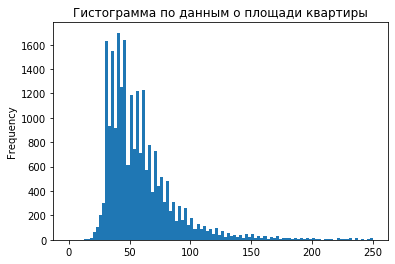

count    23650.000000
mean        60.100930
std         35.673519
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64

In [114]:
#Построение гистограммы по данным о площади квартиры
import matplotlib.pyplot as plt
realty['total_area'].plot(kind='hist',bins=100, range=(0,250), title = 'Гистограмма по данным о площади квартиры')
plt.show()
realty['total_area'].describe()

Гистограмма по данным о площади квартиры позволяет предположить, что площадь от 30 кв.метров до 60 кв.метров является превалирующей.

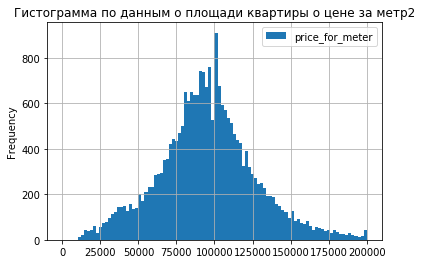

In [115]:
#Построение гистограммы по данным о цене за метр2
realty['price_for_meter'].max()
#realty['price_for_meter'].hist(bins=10,figsize=(10,10), range=(0,100000))
realty.plot(kind='hist', y='price_for_meter', bins=100, grid=True, range=(0,200000),title = 'Гистограмма по данным о площади квартиры о цене за метр2')
plt.show()

Гистограмма по данным о цене за метр2 позволяет предположить, что цена колеблется от 50 000 до 125 000.

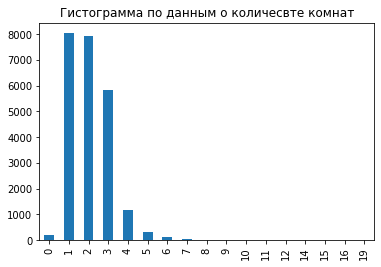

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [14]:
#Построение гистограммы по данным о количесвте комнат
realty['rooms'].value_counts().sort_index().plot.bar(title = 'Гистограмма по данным о количестве комнат')
plt.show()
realty['rooms'].describe()

Гистограмма по данным о количестве комнат наглядно демонстрирует превалирование однокомнатных и двухкомнатных квартир.

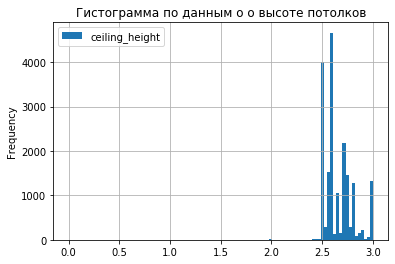

count    20757.000000
mean         2.745708
std          1.095032
min          1.000000
25%          2.550000
50%          2.600000
75%          2.760000
max        100.000000
Name: ceiling_height, dtype: float64

In [118]:
#Построение гистограммы по данным о высоте потолков
realty.plot(kind='hist', y='ceiling_height', bins=100, grid=True, range=(0,3.0),title = 'Гистограмма по данным о о высоте потолков')
plt.show()
realty['ceiling_height'].describe()

Гистограмма по данным о высоте потолковт позволяет предположить, что потолки высотой от 2,5 до 2,70 являются привалирующими.

### Изучение времени продажи квартиры

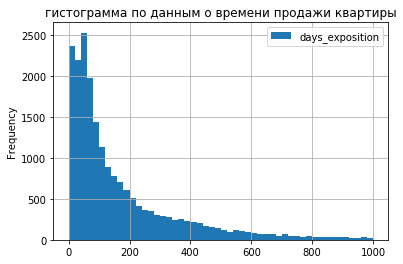

In [119]:
#Построние гистограммы по данным о врeмени продажи квартиры
realty.plot(kind='hist', y='days_exposition', bins=50, grid=True,range=(0,1000),title = 'гистограмма по данным о врeмени продажи квартиры')
plt.show()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

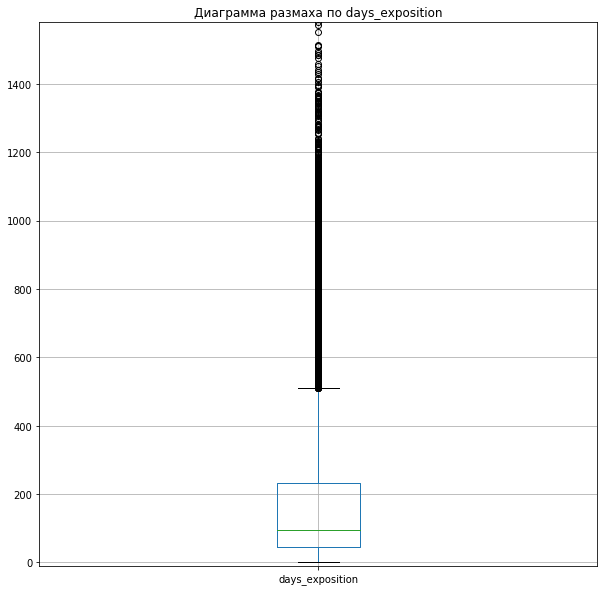

In [120]:
#Построение диаграммы размаха
realty['days_exposition'].plot.box(grid=True,figsize=(10,10), title='Диаграмма размаха по days_exposition')
plt.ylim(-10,1580)

#Расчет межквартильного размаха
q1 = realty['days_exposition'].quantile(0.25)
q3 = realty['days_exposition'].quantile(0.75)
iqr = q3 - q1

#Расчет границы интервала вероятных значений
q1 - 1.5 * iqr, q3 + 1.5 * iqr

display(realty['days_exposition'].describe())#числовое описание целевого столбца

**Вывод**

Анализ данных, полученных путем построения гистограммы, диаграммы размаха, вычислением межквартильного размаха и методом describe(), позволяет определить границы нормальных значений целевого столбца, медианное и среднее значения. Обычно продажа недвижимости может занимать около 95 дней. Самая быстрая продажа может осуществиться за 1 день. Если продажа состоялась по истечению 420 дней, то ей стоит присвоить статус "долгой".

### Ликвидация редких и выбивающихся значений

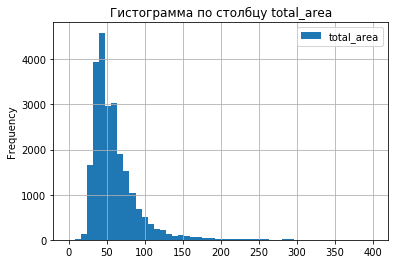

In [121]:
#Построение гистограммы по столбцу total_area
realty.plot(kind='hist', y='total_area', bins=50, grid=True,range=(0,400),title='Гистограмма по столбцу total_area')
plt.show()

count    23650.000000
mean        60.100930
std         35.673519
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64

(-3.5, 112.5)

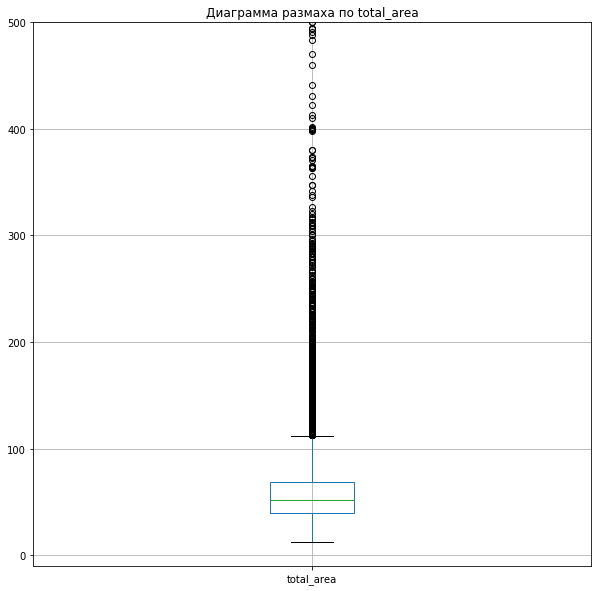

In [122]:
#Построение диаграммы размаха для total_area
realty['total_area'].plot.box(grid=True,figsize=(10,10),title='Диаграмма размаха по total_area')
plt.ylim(-10,500)
#Числовое описание total_area
display(realty['total_area'].describe())
#Расчет межквартильного размаха
q1 = realty['total_area'].quantile(0.25)
q3 = realty['total_area'].quantile(0.75)
iqr = q3 - q1
#Расчет границы интервала вероятных значений
q1 - 1.5 * iqr, q3 + 1.5 * iqr

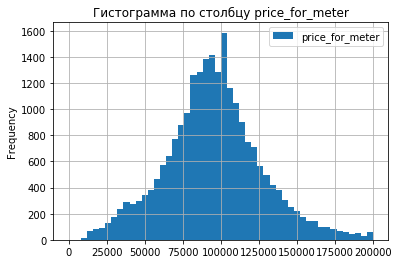

In [123]:
#Построение гистограммы по столбцу price_for_meter
realty.plot(kind='hist', y='price_for_meter', bins=50, grid=True,range=(0,200000),title='Гистограмма по столбцу price_for_meter')
plt.show()

count    2.365000e+04
mean     9.988496e+04
std      5.044967e+04
min      1.118000e+02
25%      7.700000e+04
50%      9.545450e+04
75%      1.148952e+05
max      1.907500e+06
Name: price_for_meter, dtype: float64

(20157.125, 171738.125)

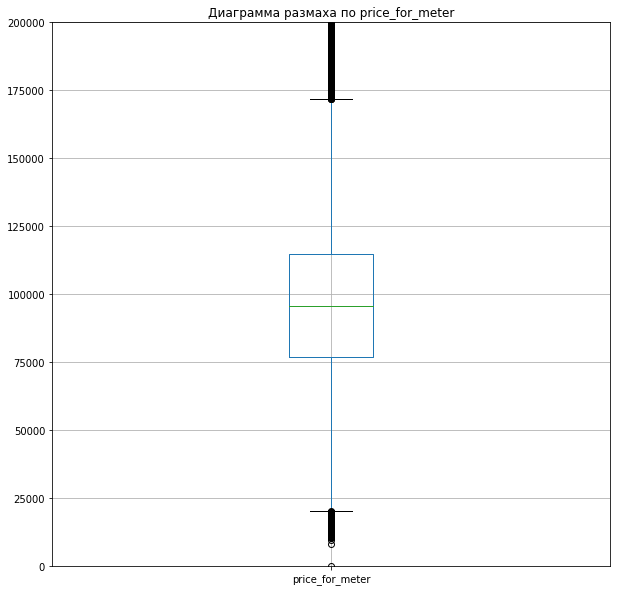

In [124]:
#Построение диаграммы размаха для price_for_meter
realty['price_for_meter'].plot.box(grid=True,figsize=(10,10),title='Диаграмма размаха по price_for_meter')
plt.ylim(-10,200000)
#Числовое описание price_for_meter
display(realty['price_for_meter'].describe())
#Расчет межквартильного размаха
q1 = realty['price_for_meter'].quantile(0.25)
q3 = realty['price_for_meter'].quantile(0.75)
iqr = q3 - q1
#Расчет границы интервала вероятных значений
q1 - 1.5 * iqr, q3 + 1.5 * iqr

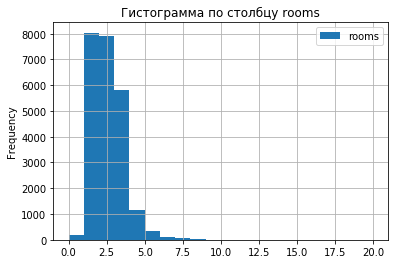

In [125]:
#Построение гистограммы по столбцу rooms
realty.plot(kind='hist', y='rooms', bins=20, grid=True,range=(0,20),title='Гистограмма по столбцу rooms')
plt.show()

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

(-2.0, 6.0)

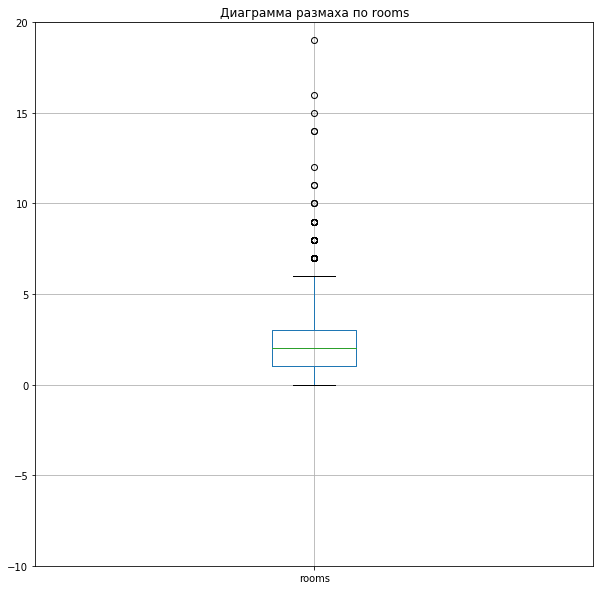

In [126]:
#Построение диаграммы размаха для rooms'
realty['rooms'].plot.box(grid=True,figsize=(10,10),title='Диаграмма размаха по rooms')
plt.ylim(-10,20)
#Числовое описание rooms
display(realty['rooms'].describe())
#Расчет межквартильного размаха
q1 = realty['rooms'].quantile(0.25)
q3 = realty['rooms'].quantile(0.75)
iqr = q3 - q1
#Расчет границы интервала вероятных значений
q1 - 1.5 * iqr, q3 + 1.5 * iqr

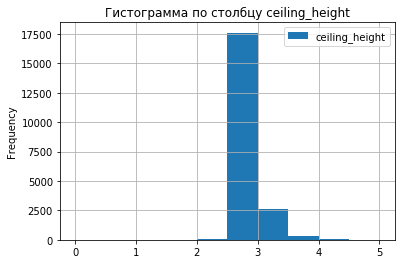

In [127]:
#Построение гистограммы по столбцу ceiling_height
realty.plot(kind='hist', bins=10, y='ceiling_height', grid=True,range=(0,5),title='Гистограмма по столбцу ceiling_height')
plt.show()

count    20757.000000
mean         2.745708
std          1.095032
min          1.000000
25%          2.550000
50%          2.600000
75%          2.760000
max        100.000000
Name: ceiling_height, dtype: float64

(2.235, 3.0749999999999997)

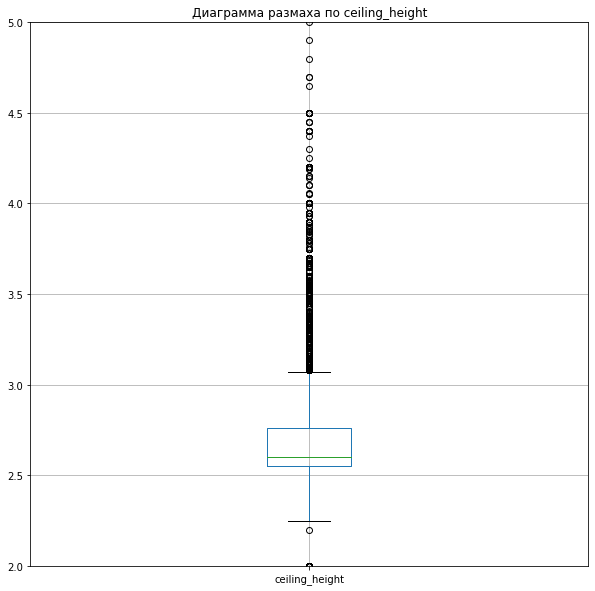

In [128]:
#Построение диаграммы размаха для ceiling_height
realty['ceiling_height'].plot.box(grid=True,figsize=(10,10),title='Диаграмма размаха по ceiling_height')
plt.ylim(2,5)
#Числовое описание rooms
display(realty['ceiling_height'].describe())
#Расчет межквартильного размаха
q1 = realty['ceiling_height'].quantile(0.25)
q3 = realty['ceiling_height'].quantile(0.75)
iqr = q3 - q1
#Расчет границы интервала вероятных значений
q1 - 1.5 * iqr, q3 + 1.5 * iqr

In [129]:
#Создаем фрейм без выбросов
realty_second = realty.query('12 < total_area < 113 and 20000 < price_for_meter < 175000 and rooms < 6 and 2.4 < ceiling_height < 3.2 and days_exposition < 420')
realty_second.info()
realty_second.head(15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14080 entries, 4 to 23695
Data columns (total 29 columns):
total_images             14080 non-null int64
last_price               14080 non-null int64
total_area               14080 non-null int64
first_day_exposition     14080 non-null datetime64[ns]
rooms                    14080 non-null int64
ceiling_height           14080 non-null float64
floors_total             14080 non-null int64
living_area              14080 non-null float64
floor                    14080 non-null int64
is_apartment             14080 non-null bool
studio                   14080 non-null bool
open_plan                14080 non-null bool
kitchen_area             14080 non-null float64
balcony                  14080 non-null int64
locality_name            14080 non-null object
airports_nearest         14080 non-null int64
city_centers_nearest     14080 non-null int64
parks_around3000         14080 non-null int64
parks_nearest            14080 non-null int64
pond

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,day_posting,month_posting,year_posting,floor_fl,liv_area_to_total,kitchen_area_to_total
4,2,10000000,100,2018-06-19,2,3.03,14,32.00,13,False,...,1,48,121,100000.0,Вторник,Июнь,2018,другой,0.3,0.4
5,10,2890000,30,2018-09-10,1,2.60,12,14.40,5,False,...,1,502,55,96333.3,Понедельник,Сентябрь,2018,другой,0.5,0.3
6,6,3700000,37,2017-11-02,1,2.60,26,10.60,6,False,...,0,502,155,100000.0,Четверг,Ноябрь,2017,другой,0.3,0.4
8,20,2900000,33,2018-05-23,1,2.60,27,15.43,26,False,...,1,502,189,87878.8,Среда,Май,2018,другой,0.5,0.3
9,18,5400000,61,2017-02-26,3,2.50,9,43.60,7,False,...,0,502,289,88524.6,Воскресенье,Февраль,2017,другой,0.7,0.1
10,5,5050000,39,2017-11-16,1,2.67,12,20.30,3,False,...,2,553,137,129487.2,Четверг,Ноябрь,2017,другой,0.5,0.2
11,9,3300000,44,2018-08-27,2,2.50,5,31.00,4,False,...,0,502,7,75000.0,Понедельник,Август,2018,другой,0.7,0.1
12,10,3890000,54,2016-06-30,2,2.60,5,30.00,5,False,...,1,502,90,72037.0,Четверг,Июнь,2016,последний,0.6,0.2
13,20,3550000,42,2017-07-01,2,2.56,5,27.00,5,False,...,3,298,366,84523.8,Суббота,Июль,2017,последний,0.6,0.1
14,1,4400000,36,2016-06-23,1,2.50,6,17.00,1,False,...,1,96,203,122222.2,Четверг,Июнь,2016,первый,0.5,0.2


**Вывод**

Посредством построения гистограмм, диаграмм размаха и расчётов IQR были получены данные по целевым столбцам. Особенностями этих данных являются так называемые выбросы - значения, не входящие в размах нормальных значений. Анализ данных позволил выполнить срез методом query(), тем самым ликвидировать редкие и выбивающиеся значения.

### Факторы, влияющие на стоимость квартиры

#### Графики зависимости цены от площади, числа комнат, удалённости от центра, даты размещения(дня, месяца, года)

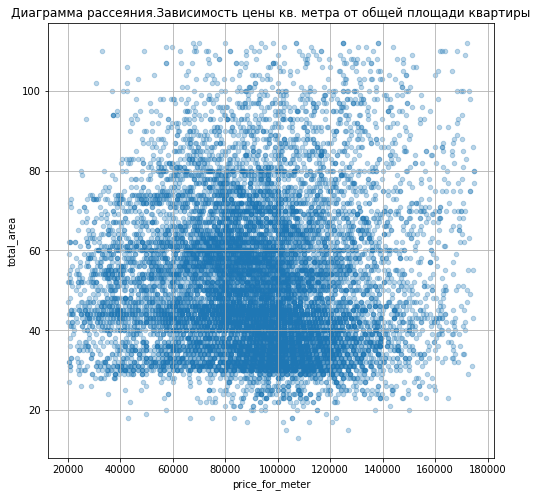

Корреляция: -0.0030105416886554385


In [130]:
#Построим график зависимости цены кв. метра от общей площади квартиры
realty_second.plot(kind='scatter',x='price_for_meter',y='total_area',figsize=(8,8), grid=True,alpha=0.3, title='Диаграмма рассеяния.Зависимость цены кв. метра от общей площади квартиры')
plt.show()
print('Корреляция:',realty_second['price_for_meter'].corr(realty_second['total_area']))

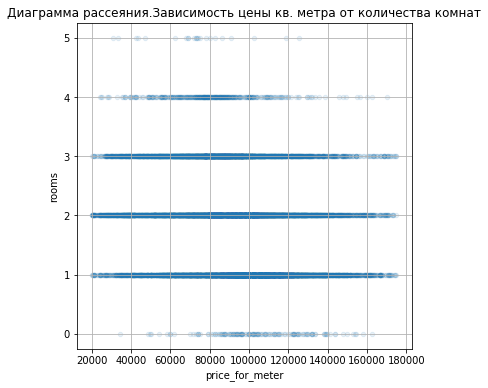

Корреляция: -0.19303823076190885


In [131]:
#Построим график зависимости цены кв. метра от количества комнат
realty_second.plot(kind='scatter',x='price_for_meter',y='rooms',figsize=(6,6), grid=True,alpha=0.1, title='Диаграмма рассеяния.Зависимость цены кв. метра от количества комнат')
plt.show()
print('Корреляция:',realty_second['price_for_meter'].corr(realty_second['rooms']))

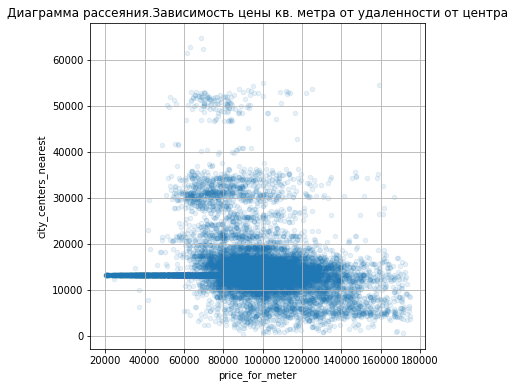

Корреляция: -0.17754337574762352


In [132]:
#Построим график зависимости цены кв. метра от удаленности от центра
realty_second.plot(kind='scatter',x='price_for_meter',y='city_centers_nearest',figsize=(6,6), grid=True,alpha=0.1, title='Диаграмма рассеяния.Зависимость цены кв. метра от удаленности от центра')
plt.show()
print('Корреляция:',realty_second['price_for_meter'].corr(realty_second['city_centers_nearest']))

#### График зависимости цены от этажа

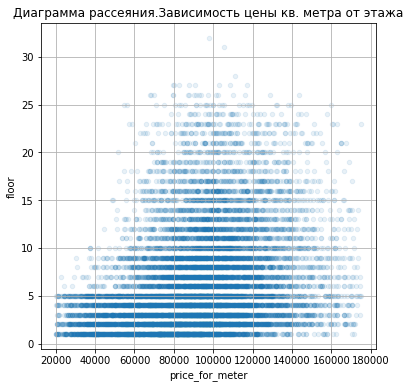

Корреляция: 0.27932398413983656


In [133]:
#Построим график зависимости цены кв. метра от этажа
realty_second.plot(kind='scatter',x='price_for_meter',y='floor',figsize=(6,6), grid=True,alpha=0.1, title='Диаграмма рассеяния.Зависимость цены кв. метра от этажа')
plt.show()
print('Корреляция:',realty_second['price_for_meter'].corr(realty_second['floor']))

#### Графики зависимости цены от дня недели, месяца и года

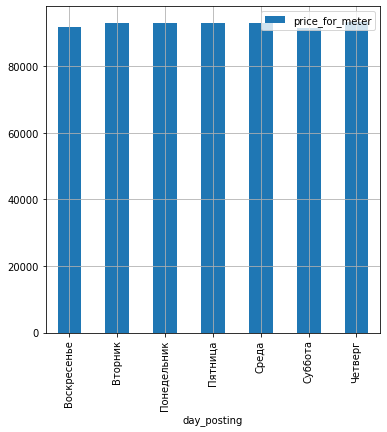

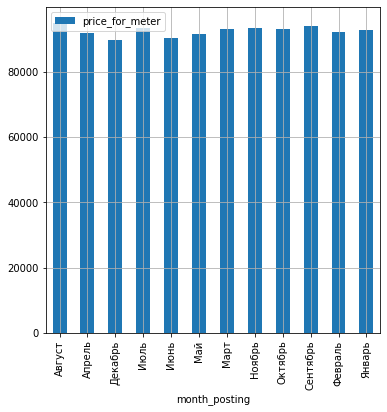

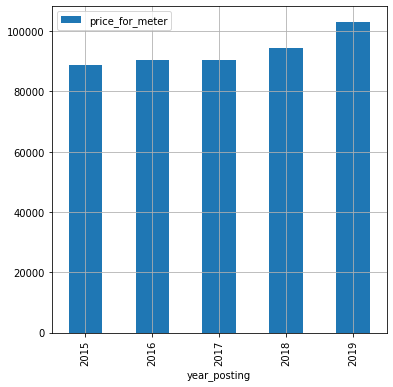

In [134]:
day_month_year = ['day_posting','month_posting', 'year_posting']
for value in day_month_year:
    realty_second.pivot_table(index = value, values = 'price_for_meter', aggfunc = 'median').plot(kind = 'bar', figsize=(6,6),grid=True)

Графики, построенные по данным столбцов - факторов, влияющих на стоимость квартиры, позволяют наглядно оценить степень их влияния в зависимости от площади, числа комнат, удалённости от центра, этажа, даты размещения(дня, месяца, года). Наряду с построением скаттерплотов, была вычислена корреляция стоимости м2 с общей площадью, расстоянием до центра, количеством комнат и этажом. Наиболее высокая корреляция получилась с последним параметром. Наиболее высокая стоимость отслеживается по дням публикации: вторник, среда и четверг; по месяцам: август, апрель, март, ноябрь; стоимость жилья существенно увелисилась в 2015, а начиная с 2018 продолжила свой рост.

### Анализ десяти населённых пунктов с наибольшим числом объявлений

In [135]:
#Введем новую переменную local_name_top_10 для индексов 10 населенных пунктов по значению value_counts()
local_name_top_10 = realty_second['locality_name'].value_counts().head(10).index.values
#Выведем населеные пункты на экран
display(local_name_top_10)
#Выполним фильтрацию по local_name_top_10
realty_second[realty_second['locality_name'].isin(local_name_top_10)].head(10)
#Найдем среднюю цену за кв.метр в списке local_name_top_10
mean_price_top10 = realty_second[realty_second['locality_name'].isin(local_name_top_10)].groupby('locality_name').agg({'price_for_meter':'mean'})
display(mean_price_top10)

array(['Санкт-Петербург', 'посёлок Мурино', 'Всеволожск',
       'посёлок Шушары', 'деревня Кудрово', 'посёлок Парголово',
       'Гатчина', 'Колпино', 'Пушкин', 'Выборг'], dtype=object)

,price_for_meter
locality_name,
Всеволожск,67209.493403
Выборг,57578.515029
Гатчина,69067.849782
Колпино,75259.507075
Пушкин,100400.466667
Санкт-Петербург,105804.987744
деревня Кудрово,93149.046183
посёлок Мурино,86690.141737
посёлок Парголово,90063.695918


In [136]:
#Выделим населённые пункты с самой высокой и низкой стоимостью жилья в среднем
max_price_top = mean_price_top10['price_for_meter'].sort_values(ascending=False).head(1)
min_price_top = mean_price_top10['price_for_meter'].sort_values(ascending=False).tail(1)
display('Населенный пункт с самой высокой стоимостью жилья:',max_price_top)
display('Населенный пункт с самой низкой стоимостью жилья:',min_price_top)

'Населенный пункт с самой высокой стоимостью жилья:'

locality_name
Санкт-Петербург    105804.987744
Name: price_for_meter, dtype: float64

'Населенный пункт с самой низкой стоимостью жилья:'

locality_name
Выборг    57578.515029
Name: price_for_meter, dtype: float64

Анализ десяти населённых пунктов с наибольшим числом объявлений проведен успешно, целевые результаты наглядны.

### Анализ изменения цены по степени удалённости от центра

4      8.0
9     15.0
10    14.0
16    11.0
18    11.0
Name: distance_to_centr_km, dtype: float64


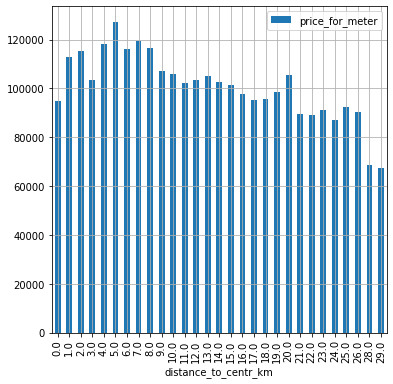

In [137]:
#Выполним срез по заданному условию
center_query = realty_second.query('locality_name == "Санкт-Петербург"')
#Добавим новый столбец с расстоянием до СПб в километрах
center_query['distance_to_centr_km'] = (center_query['city_centers_nearest']/1000).round(0)
print(center_query['distance_to_centr_km'].head())
center_query.pivot_table(index='distance_to_centr_km', values='price_for_meter', aggfunc='median').plot(grid=True, figsize=(6,6),kind='bar')
plt.show()

Анализ графика зависимости цены кв.метра от расстояния до центра позволяет предположить, что к центральной зоне будет относиться территория в радиусе 5-6 км от центра Санкт-Петербурга. Очевидно, стоимость недвижимости уменьшается по мере удаления от центра.

### Сравнение выводов по квартирам в центре и общих выводов по всему городу

In [138]:
#Создадим фрейм центральной зоны СПб
spb_center_query = center_query.query('distance_to_centr_km <= 5')
spb_center_query.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_for_meter,day_posting,month_posting,year_posting,floor_fl,liv_area_to_total,kitchen_area_to_total,distance_to_centr_km
137,11,13310800,85,2018-01-01,2,2.70,10,31.52,5,False,...,133,340,156597.6,Понедельник,Январь,2018,другой,0.4,0.3,4.0
159,14,7050000,66,2017-09-04,3,3.00,4,37.80,4,False,...,1013,98,106818.2,Понедельник,Сентябрь,2017,последний,0.6,0.2,5.0
316,11,5650000,46,2017-03-13,2,2.50,6,28.80,2,False,...,502,89,122826.1,Понедельник,Март,2017,другой,0.6,0.2,3.0
318,12,9990000,67,2017-07-10,1,2.84,9,37.00,7,False,...,713,50,149104.5,Понедельник,Июль,2017,другой,0.6,0.3,5.0
320,2,12734000,97,2016-01-30,3,2.75,10,51.20,7,False,...,874,195,131278.4,Суббота,Январь,2016,другой,0.5,0.2,5.0


#### Построение гистаграмм сравнения центральной зоны СПб со всем городом по площади, цене, числу комнат, высоте потолков

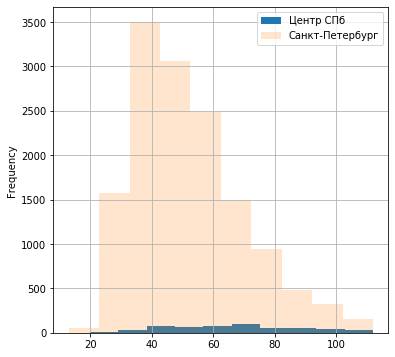

In [139]:
#Построение гистограмм по данным о площади квартиры
spb_center_query.query('locality_name == "Санкт-Петербург"')['total_area'].plot(kind='hist',grid=True,  label='Центр СПб',figsize=(6,6))
realty_second.query('locality_name == locality_name')['total_area'].plot(kind='hist',grid=True, alpha=0.2, label='Санкт-Петербург')
plt.legend()
plt.show()

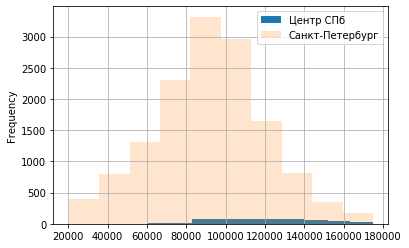

In [140]:
#Построение гистограмм по данным о цене за метр
spb_center_query.query('locality_name == "Санкт-Петербург"')['price_for_meter'].plot(kind='hist',grid=True,  label='Центр СПб')
realty_second.query('locality_name == locality_name')['price_for_meter'].plot(kind='hist',grid=True, alpha=0.2, label='Санкт-Петербург')
plt.legend()
plt.show()

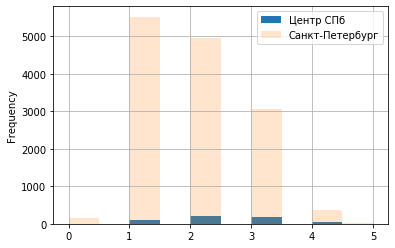

In [141]:
#Построение гистограмм по данным о количесвте комнат
spb_center_query.query('locality_name == "Санкт-Петербург"')['rooms'].plot(kind='hist',grid=True,  label='Центр СПб')
realty_second.query('locality_name == locality_name')['rooms'].plot(kind='hist',grid=True, alpha=0.2, label='Санкт-Петербург')
plt.legend()
plt.show()

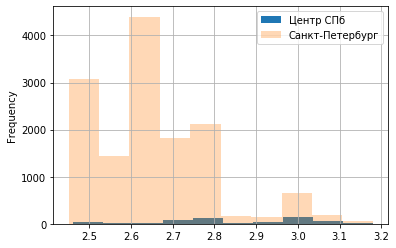

In [142]:
#Построение гистограмм по данным о высоте потолков
spb_center_query.query('locality_name == "Санкт-Петербург"')['ceiling_height'].plot(kind='hist',grid=True,  label='Центр СПб')
realty_second.query('locality_name == locality_name')['ceiling_height'].plot(kind='hist',grid=True, alpha=0.3, label='Санкт-Петербург')
plt.legend()
plt.show()

Гистаграммы сравнения центральной зоны СПб со всем городом наглядно демонстрируют отличия по площади, цене, числу комнат и высоте потолков.

#### Факторы, влияющие на стоимость квартиры в центральной зоне. Число комнат, этаж, удалённость от центра, дата размещения объявления

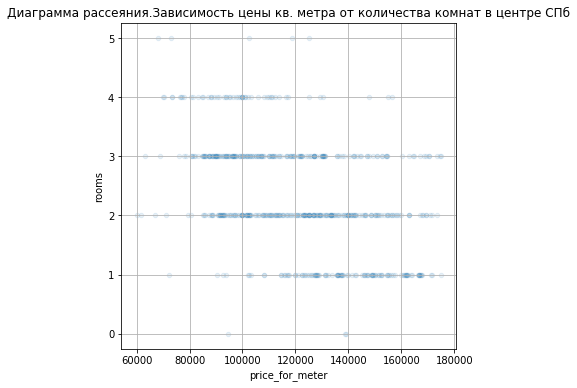

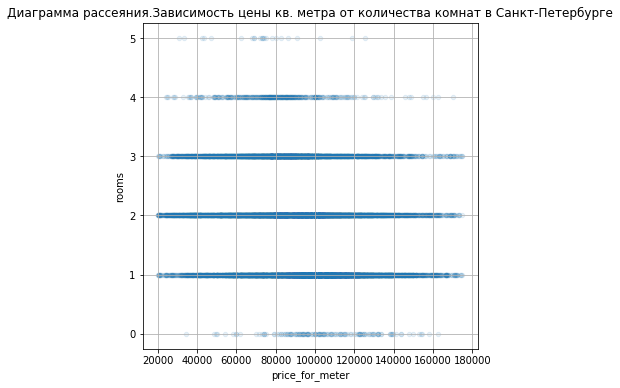

Корреляция по центру СПб: -0.43235294759652754
Корреляция по Санкт-Петербургу: -0.19303823076190885


In [143]:
#Построим графики зависимости цены кв. метра от числа комнат
spb_center_query.plot(kind='scatter',x='price_for_meter',y='rooms',figsize=(6,6), grid=True,alpha=0.1, title='Диаграмма рассеяния.Зависимость цены кв. метра от количества комнат в центре СПб')
realty_second.plot(kind='scatter',x='price_for_meter',y='rooms',figsize=(6,6), grid=True,alpha=0.1, title='Диаграмма рассеяния.Зависимость цены кв. метра от количества комнат в Санкт-Петербурге')
plt.show()
print('Корреляция по центру СПб:',spb_center_query['price_for_meter'].corr(realty_second['rooms']))
print('Корреляция по Санкт-Петербургу:',realty_second['price_for_meter'].corr(realty_second['rooms']))


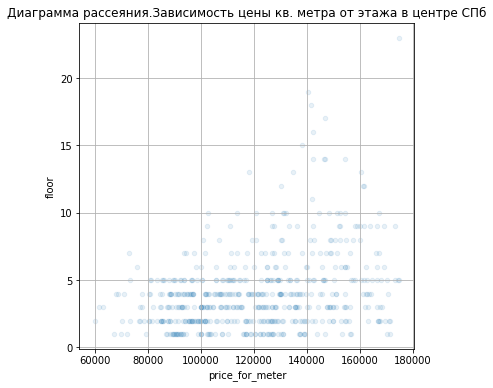

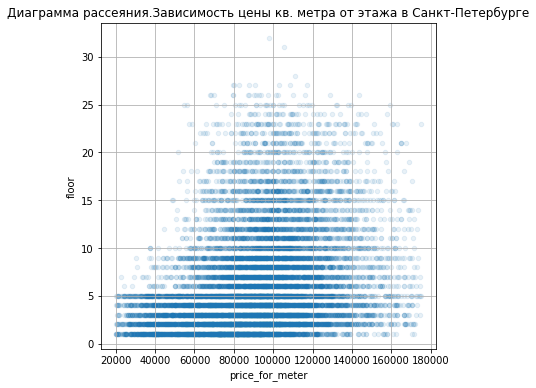

Корреляция по центру СПб: 0.3295553126557537
Корреляция по Санкт-Петербургу: 0.27932398413983656


In [144]:
#Построим графики зависимости цены кв. метра от этажа
spb_center_query.plot(kind='scatter',x='price_for_meter',y='floor',figsize=(6,6), grid=True,alpha=0.1, title='Диаграмма рассеяния.Зависимость цены кв. метра от этажа в центре СПб')
realty_second.plot(kind='scatter',x='price_for_meter',y='floor',figsize=(6,6), grid=True,alpha=0.1, title='Диаграмма рассеяния.Зависимость цены кв. метра от этажа в Санкт-Петербурге')
plt.show()
print('Корреляция по центру СПб:',spb_center_query['price_for_meter'].corr(realty_second['floor']))
print('Корреляция по Санкт-Петербургу:',realty_second['price_for_meter'].corr(realty_second['floor']))

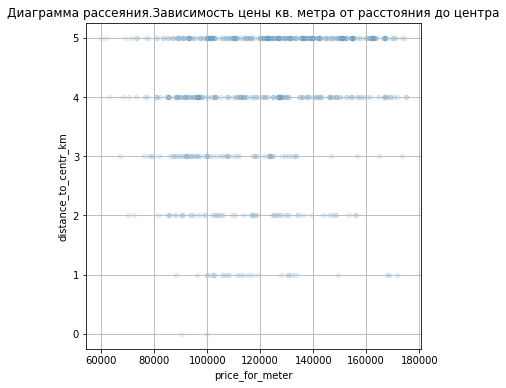

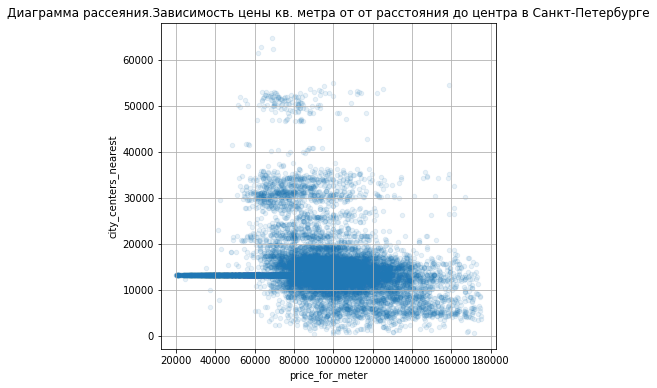

Корреляция по центру СПб: 0.18469222383788927
Корреляция по Санкт-Петербургу: -0.17754337574762352


In [145]:
#Построим графики зависимости цены кв. метра от расстояния до центра
spb_center_query.plot(kind='scatter',x='price_for_meter',y='distance_to_centr_km',figsize=(6,6), grid=True,alpha=0.1, title='Диаграмма рассеяния.Зависимость цены кв. метра от расстояния до центра')
realty_second.plot(kind='scatter',x='price_for_meter',y='city_centers_nearest',figsize=(6,6), grid=True,alpha=0.1, title='Диаграмма рассеяния.Зависимость цены кв. метра от от расстояния до центра в Санкт-Петербурге')
plt.show()
print('Корреляция по центру СПб:',spb_center_query['price_for_meter'].corr(spb_center_query['distance_to_centr_km']))
print('Корреляция по Санкт-Петербургу:',realty_second['price_for_meter'].corr(realty_second['city_centers_nearest']))

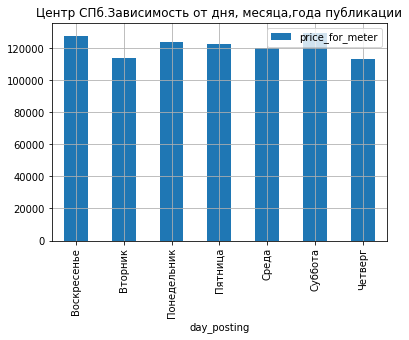

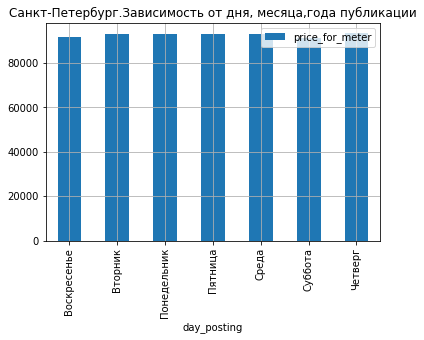

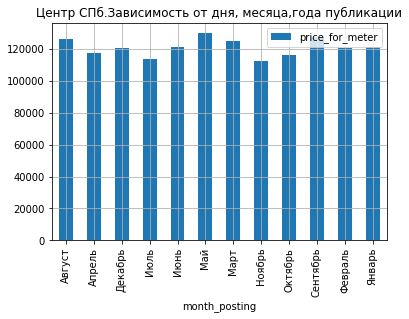

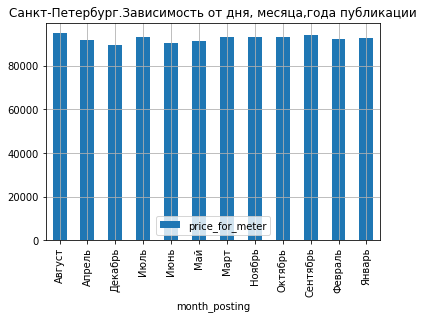

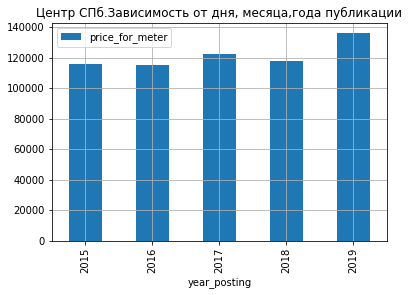

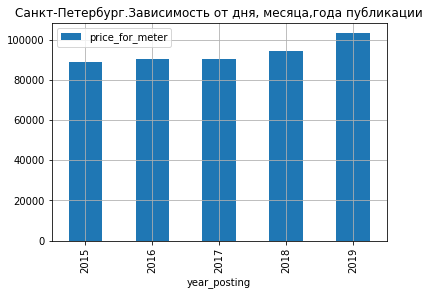

In [146]:
#Построим графики зависимости цены кв. метра от даты 
day_month_year = ['day_posting','month_posting', 'year_posting']
for value in day_month_year:
    spb_center_query.pivot_table(index = value, values = 'price_for_meter', aggfunc = 'median').plot(kind ='bar',grid=True, title='Центр СПб.Зависимость от дня, месяца,года публикации')
    realty_second.pivot_table(index = value, values = 'price_for_meter', aggfunc = 'median').plot(kind = 'bar',grid=True,title='Санкт-Петербург.Зависимость от дня, месяца,года публикации')

Гистаграммы сравнения центральной зоны СПб со всем городом наглядно демонстрируют отличия факторов, влияющих на стоимость квартиры в центральной зоне. Число комнат, этаж, удалённость от центра, дата размещения объявления.

## Общий вывод

Наибольшую зависимость стоимости метра2 демонстрирует корреляция с этажом, как в центре СПб, так и по всему городу. В отличие от всего города, квартиры в центре СПб показывают большую зависимость от расстояния до центра Санкт-Петербурга. Стоит обратить внимание на зависимость стоимости жилья от дня публикации; в центре города максимальная цена фиксируется по воскресеньям, понедельникам и субботам; по всему городу это вторник, среда и четверг. Для центра СПб максимальная стоимость метра2 фиксируется в сентябрьских объявлениях, для всего Санкт-Петербурга в августе. Тенденция к повышению стоимости жилья сохраняется как для центра СПб, так и для всего города, однако, график центральной части города отличается волнообразно. Стоит отметить, что в центре Санкт-Петербурга у квартир больше площадь, больше комнат и потолки выше.